# Вариант 7

Найти все интервалы (по количеству слов) между словами «я»
в повести Ф. М. Достоевского [«Бедные люди»](https://ilibrary.ru/text/17/p.1/index.html). 
Аппроксимировать пуассоновским (poisson), геометрическим (geom), 
логарифмическим (logser) распределением.

Вывести вероятности для полученных аппроксимаций вместе с гистограммой, 
посчитать среднее значение логарифмической функции правдоподобия.

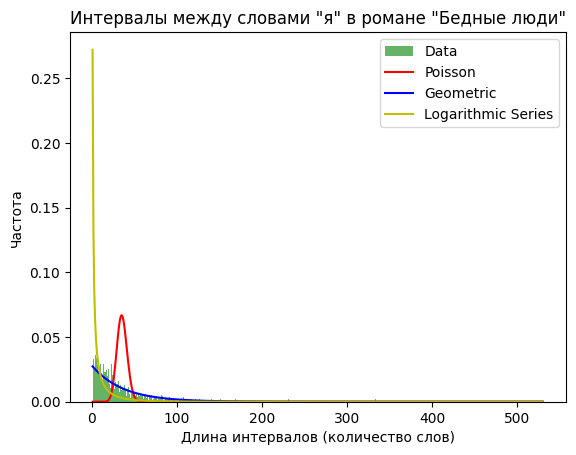

Средние значения логарифмической функции правдоподобия
Пуассоновское распределение: -20.98
Геометрическое распределение: -inf
Логарифмическое распределение: -inf


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.stats import poisson, geom, logser

# Загрузка текста "Бедные люди"
with open('book.txt', 'r', encoding='utf-8') as file:
    text = file.read().lower()

# Разделение текста на слова
words = re.findall(r'\b\w+\b', text)

# Находим индексы слова "я"
i_indices = [index for index, word in enumerate(words) if word == 'я']

# Определяем интервалы между словами "я"
i_intervals = [i_indices[i+1] - i_indices[i] - 1 for i in range(len(i_indices) - 1)]

# Строим гистограмму интервалов
plt.hist(i_intervals, bins=range(1, max(i_intervals) + 2), density=True, alpha=0.6, color='g', label='Data')

# Аппроксимация пуассоновским распределением
mu = np.mean(i_intervals)
x = np.arange(1, max(i_intervals) + 1)
poisson_pmf = poisson.pmf(x, mu)
plt.plot(x, poisson_pmf, 'r-', label='Poisson')

# Аппроксимация геометрическим распределением
p_geom = 1 / (mu + 1)
geom_pmf = geom.pmf(x, p_geom)
plt.plot(x, geom_pmf, 'b-', label='Geometric')

# Аппроксимация логарифмическим распределением
p_logser = 1 - (1 / mu)
logser_pmf = logser.pmf(x, p_logser)
plt.plot(x, logser_pmf, 'y-', label='Logarithmic Series')

# Настройка графика
plt.xlabel('Длина интервалов (количество слов)')
plt.ylabel('Частота')
plt.title('Интервалы между словами "я" в романе "Бедные люди"')
plt.legend()
plt.show()

# Вычисление среднего значения логарифмической функции правдоподобия
log_likelihood_poisson = np.mean(poisson.logpmf(i_intervals, mu))
log_likelihood_geom = np.mean(geom.logpmf(i_intervals, p_geom))
log_likelihood_logser = np.mean(logser.logpmf(i_intervals, p_logser))

print('Средние значения логарифмической функции правдоподобия')
print(f'Пуассоновское распределение: {log_likelihood_poisson:.2f}')
print(f'Геометрическое распределение: {log_likelihood_geom:.2f}')
print(f'Логарифмическое распределение: {log_likelihood_logser:.2f}')